In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from src.models.bfgpc import BFGPC_ELBO
from src.utils_plotting import plot_bfgpc_predictions_two_axes

In [2]:
def load_all_lf_data():
    filepaths = ['01_2M.npz', '02_2M.npz', '03_2M.npz', '04_2M.npz']
    all_xs = []
    all_ys = []
    for filepath in filepaths:
        data = np.load("./../data/" + filepath)
        x = data["xis"][:, [2, 4]].astype(np.float32)
        y = data["chis"]
        all_xs.append(x)
        all_ys.append(y)

    xs = np.concatenate(all_xs, axis=0)
    ys = np.concatenate(all_ys, axis=0)

    return xs / np.array([[15, 100]]), ys

X_lf, Y_lf = load_all_lf_data()

def load_all_hf_data():
    filepaths = ['01_15M.npz', 'test_01_15M.npz', 'test_02_15M.npz', '02_15M.npz', '03_15M.npz', '04_15M.npz']
    all_xs = []
    all_ys = []
    for filepath in filepaths:
        data = np.load("./../data/" + filepath)
        x = data["xis"][:, [2, 4]].astype(np.float32)
        y = data["chis"]
        all_xs.append(x)
        all_ys.append(y)

    xs = np.concatenate(all_xs, axis=0)
    ys = np.concatenate(all_ys, axis=0)

    return xs / np.array([[15, 100]]), ys

X_hf, Y_hf = load_all_hf_data()

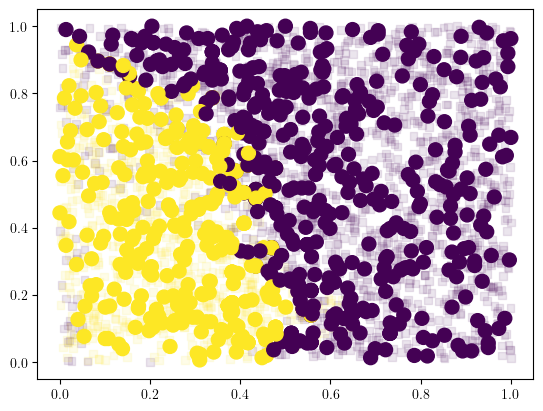

In [3]:
 # Plot initial training data
plt.figure()
plt.scatter(X_lf[:, 0], X_lf[:, 1], c=Y_lf, cmap='viridis', marker='s', s=30, alpha=0.1)
plt.scatter(X_hf[:, 0], X_hf[:, 1], c=Y_hf, cmap='viridis', marker='o', s=100)
plt.show()

In [4]:
# Randomly cut LF down to 1000
lf_inds = np.random.choice(len(X_lf), size=1000, replace=False)
X_lf = X_lf[lf_inds]
Y_lf = Y_lf[lf_inds]

# Create MF classifier instance
# Since data is already normalized, pass identity to denormalize for sampling_func
# Or, better, make sampling_func expect normalized inputs directly
X_lf = torch.from_numpy(X_lf).float()
X_hf = torch.from_numpy(X_hf).float()
Y_lf = torch.from_numpy(Y_lf).float()
Y_hf = torch.from_numpy(Y_hf).float()


print(X_lf.shape)
print(X_hf.shape)

torch.Size([1000, 2])
torch.Size([783, 2])


In [5]:

model = BFGPC_ELBO(X_lf, X_hf, n_inducing_pts=256)
model.train_model(X_lf, Y_lf, X_hf, Y_hf, n_epochs=500, lr=0.1, verbose=True)

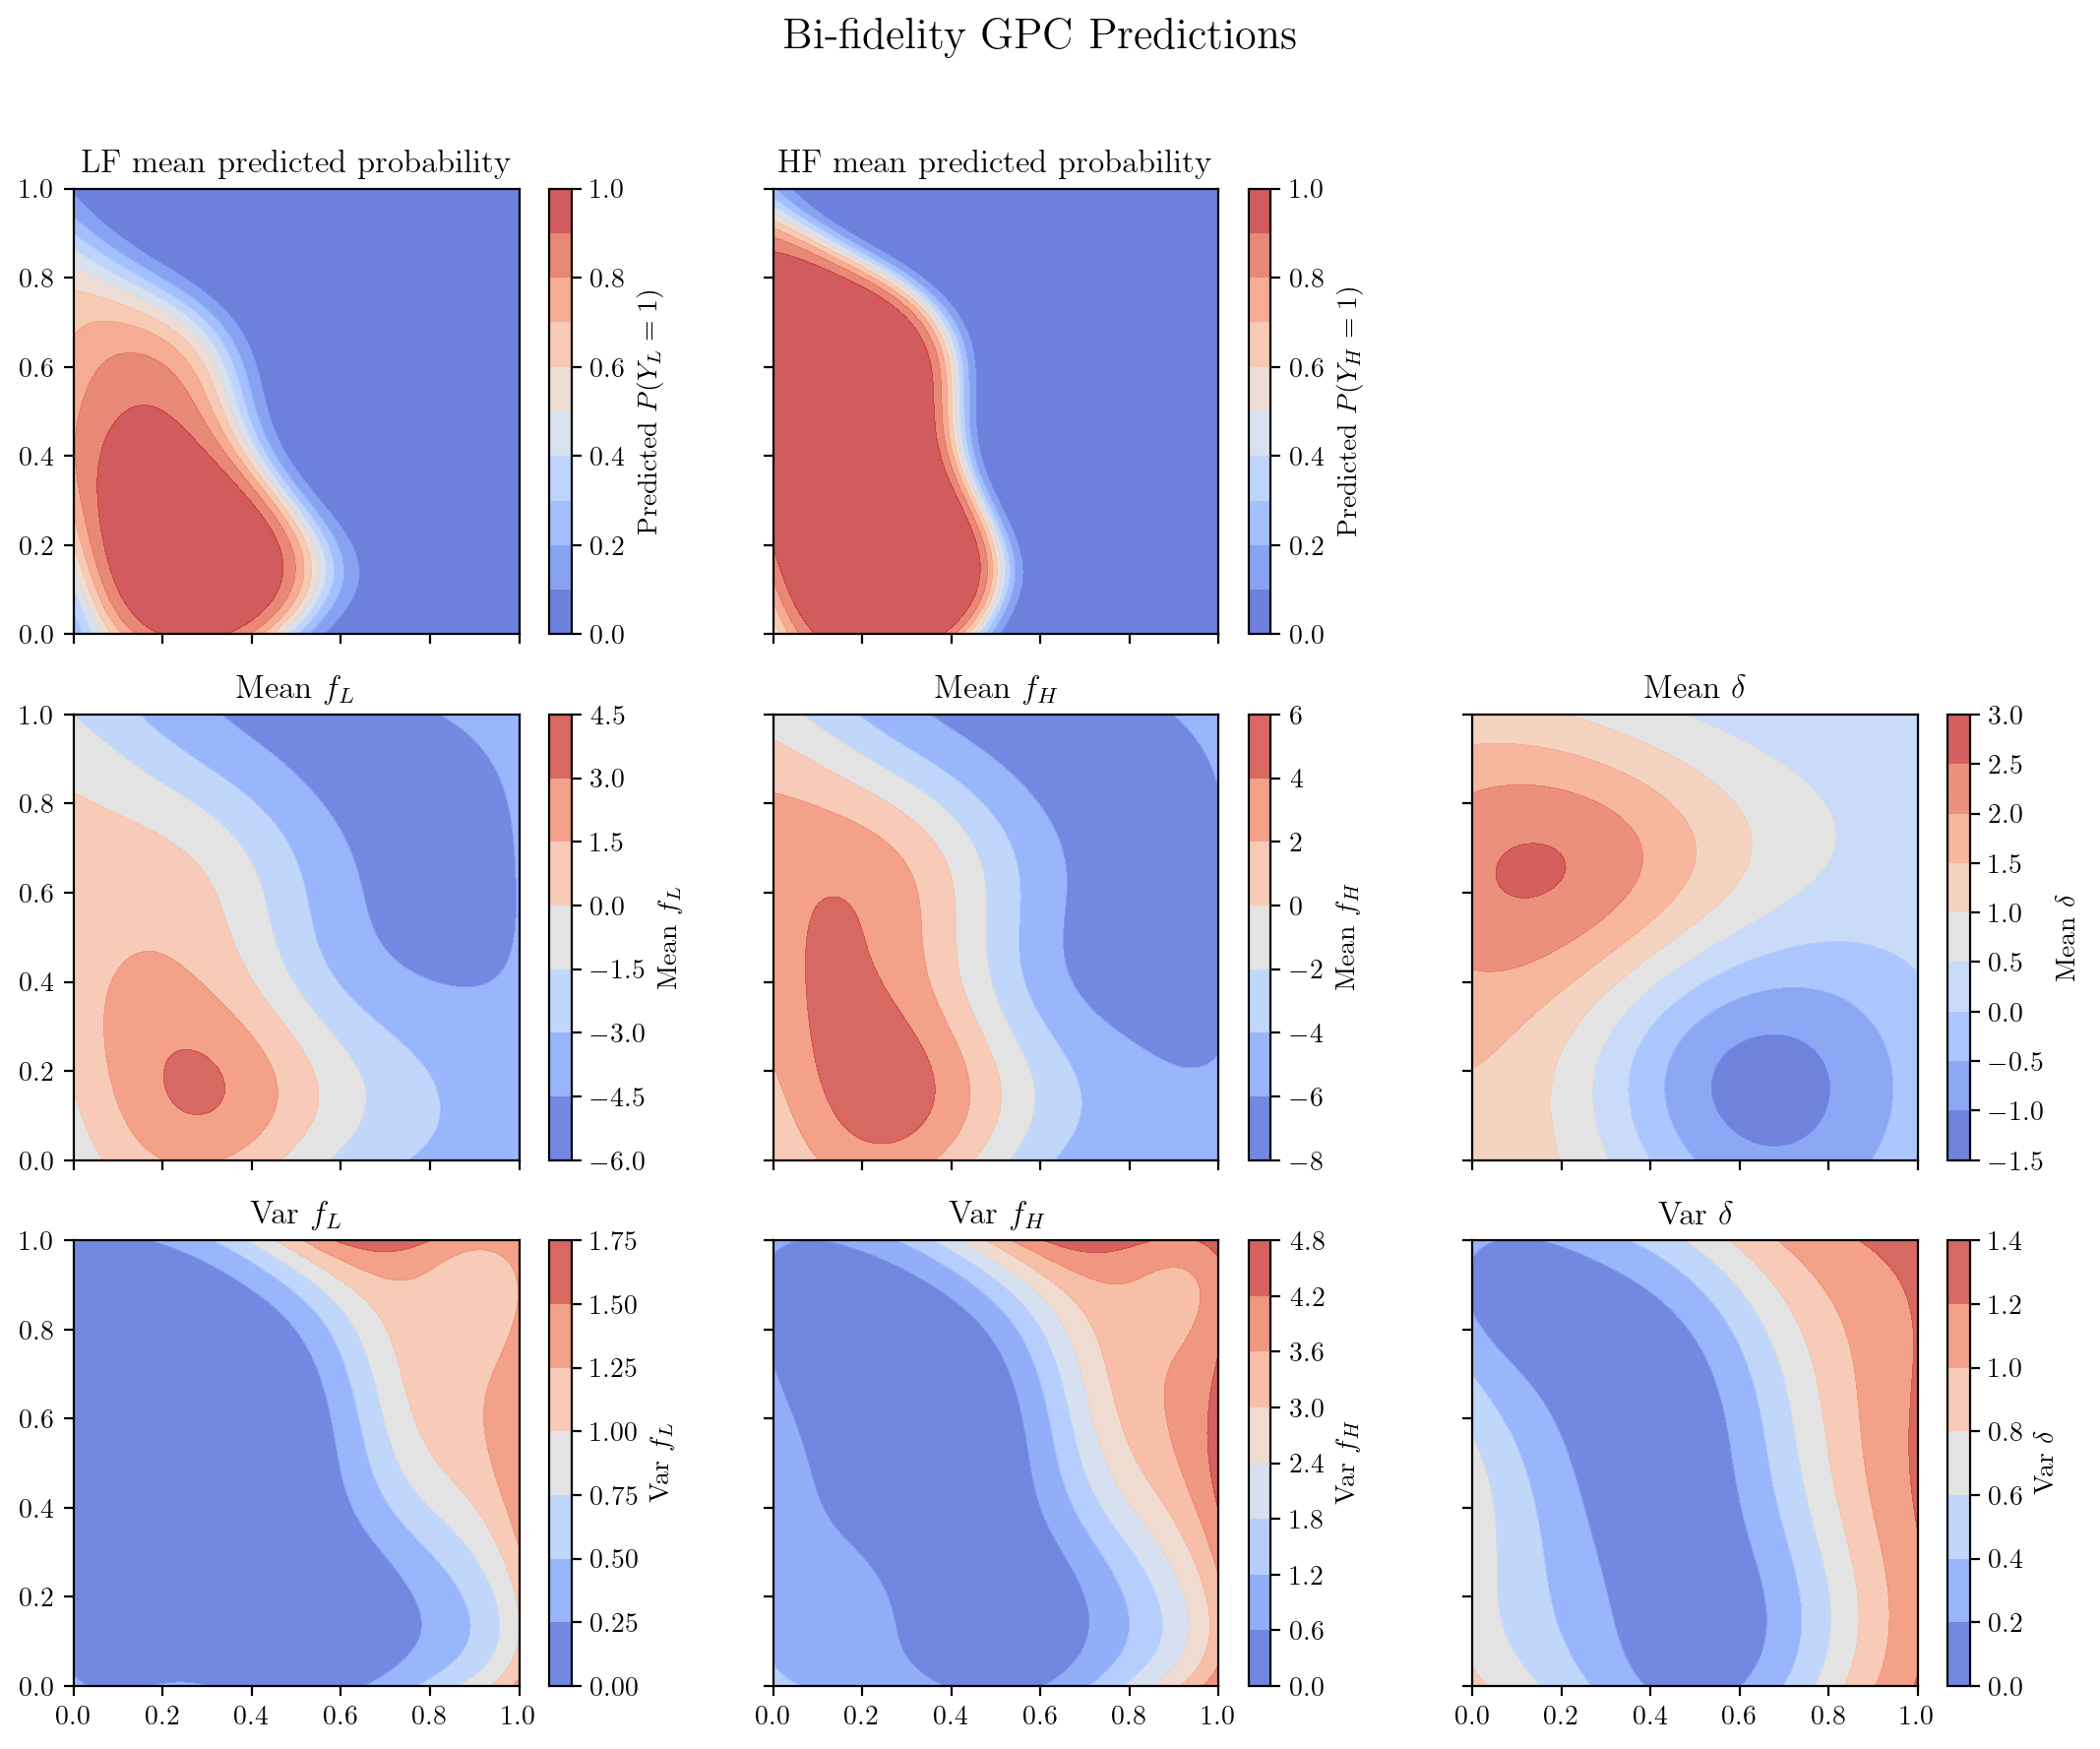

In [6]:
plot_bfgpc_predictions_two_axes(model)